### The following code will generate the plots associated with comparing the performance of the OWL against human scorers

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, linregress
from statistics import mean, stdev
from math import sqrt
import statsmodels.api as sm

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#combined.to_csv('C:/Users/Emily/Desktop/UL_analysis/S1_manual_counts/20220215_combined.csv')
combined = pd.read_csv('C:/Users/Emily/Desktop/UL_analysis/S1_manual_counts/20220215_combined.csv', index_col=0)
counts = pd.read_csv('C:/Users/Emily/Desktop/UL_analysis/Manual vs OWL counts.csv', index_col=0)
hva = counts.iloc[:, 0:9].copy() 
hva.drop(hva.tail(3).index,inplace=True)
hva.tail()

,Image_ID,Scanner_Slot/Plate,Well,Strain,OWL_Count,Person1_Count,Person2_Count,Person1,Person2
Compound,,,,,,,,,
Water,S1_008,4.0,B,N2,366.0,627.0,584.0,Ehsan,Tessa
Water,S1_015,4.0,B,N2,183.0,268.0,261.0,Ehsan,Tessa
DMSO,S1_004,2.0,D,N2,451.0,666.0,745.0,Ehsan,Chandni
DMSO,S1_008,4.0,D,N2,372.0,577.0,679.0,Ehsan,Chandni
DMSO,S1_015,4.0,D,N2,245.0,345.0,359.0,Ehsan,Chandni


### Total Worms: (H1,H2) vs OWL

1. Calculating regression stats for total worms counted by Humans vs OWL

In [7]:
h1_counts = hva['Person1_Count']
h2_counts = hva['Person2_Count']
OWL_counts = hva['OWL_Count']

h1c_df = pd.DataFrame(list(zip(OWL_counts, h1_counts)),
               columns =['OWL', 'Human']).dropna()

h2c_df = pd.DataFrame(list(zip(OWL_counts, h2_counts)),
               columns =['OWL', 'Human']).dropna()
longc = h1c_df.append(h2c_df)


slope, intercept, r_value, p_value, std_err = linregress(longc['Human'], longc['OWL'])
print(slope, intercept, r_value, p_value, std_err)
print(f"Pearson's correlation coefficient: {r_value:.3f}")

0.5194478243710937 39.713378430356016 0.9011659862826732 1.2417592965088699e-14 0.04164368226154043
Pearson's correlation coefficient: 0.901


In [9]:
h_X = longc['Human']
O_Y = longc['OWL']
h_X = sm.add_constant(h_X)
hvo_counts_r2 = sm.OLS(O_Y, h_X).fit()
print(hvo_counts_r2.summary())

                            OLS Regression Results                            
Dep. Variable:                    OWL   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     155.6
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.24e-14
Time:                        15:31:28   Log-Likelihood:                -193.12
No. Observations:                  38   AIC:                             390.2
Df Residuals:                      36   BIC:                             393.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7134     19.135      2.075      0.0

2. Calculating regression stats for total worms counted between humans: H1 vs H2

In [11]:
h1h2 = pd.DataFrame(list(zip(h1_counts, h2_counts)),
               columns =['H1', 'H2']).dropna()

slope, intercept, r_value, p_value, std_err = linregress(h1h2['H1'], h1h2['H2'])
print(slope, intercept, r_value, p_value, std_err)
print(f"Pearson's correlation coefficient: {r_value:.3f}")

0.8458484000557978 74.73390549191976 0.9097637723875345 6.696076439924178e-08 0.09360945644872014
Pearson's correlation coefficient: 0.910


In [25]:
h_X = h1h2['H1']
h_Y = h1h2['H2']
h_X = sm.add_constant(h_X)
hvh_counts_r2 = sm.OLS(h_Y, h_X).fit()
print(hvh_counts_r2.summary())

                            OLS Regression Results                            
Dep. Variable:                     H2   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     81.65
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           6.70e-08
Time:                        15:35:40   Log-Likelihood:                -105.48
No. Observations:                  19   AIC:                             215.0
Df Residuals:                      17   BIC:                             216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7339     42.805      1.746      0.0

3. Generating the regression plot comparing the total worm counts for Humans v OWL and H1 v H2

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


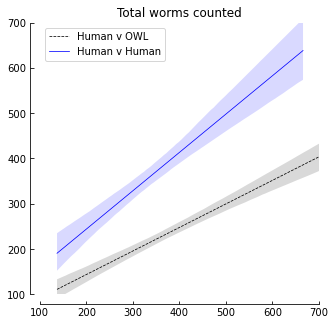

In [13]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.regplot(longc['Human'], longc['OWL'], scatter=False,
    fit_reg = True, color = 'black', label='Human v OWL', line_kws={'linewidth':.75, 'linestyle': '--'})
ax = sns.regplot(hva['Person1_Count'], hva['Person2_Count'], scatter=False,
    fit_reg = True, color = 'blue', label='Human v Human' ,line_kws={'linewidth':.75})


ax.set_xlabel('')
ax.set_ylabel('')
ax.set(xlim=(100,700), ylim=(100, 700), title='Total worms counted')
ax.tick_params(axis="both",direction="in")
sns.despine(offset=10)
ax.legend()
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_totalwrms.svg')

4. Generating residual plots for the linear regressions above

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


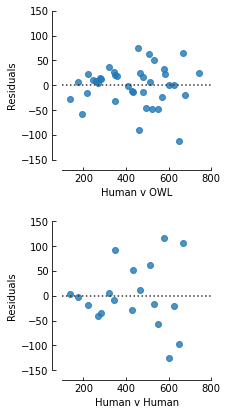

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize=(3,6), nrows=2, ncols=1)

sns.residplot(longc['Human'], longc['OWL'], ax=ax1)
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Human v OWL')
ax1.set_ylim(-150,150)
ax1.set_xlim(100,800)
ax1.tick_params(axis='both',direction="in")

ratio = 1.0
x_left, x_right = ax1.get_xlim()
y_low, y_high = ax1.get_ylim()
ax1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

sns.residplot(hva['Person1_Count'], hva['Person2_Count'], ax=ax2)

ax2.set_ylabel('Residuals')
ax2.set_xlabel('Human v Human')
ax2.set_ylim(-150,150)
ax2.set_xlim(100,800)
ax2.tick_params(axis='both',direction="in")
ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

sns.despine(offset=10)
fig.tight_layout()
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_totalwrms_resids.svg')

### Mean position: (H1, H2) vs OWL

1. Generating a dataframe of the mean worm position for each scoring regime

In [15]:
g = combined.groupby(['FileName', 'Counter']).mean().reset_index()
h1 = g.loc[g['Counter']=='H1']['X']
h2 = g.loc[g['Counter']=='H2']['X']
OWL = g.loc[g['Counter']=='Auto']['X']

xs = pd.DataFrame(list(zip(OWL, h1, h2)),
               columns =['OWL', 'H1', 'H2'])

2. Calculating the regressions stats comparing the mean position between two human scorers (H1 v H2)

In [16]:
slope, intercept, r_value, p_value, std_err = linregress(xs['H1'], xs['H2'])
print(slope, intercept, r_value, p_value, std_err)
print(f"Pearson's correlation coefficient: {r_value:.3f}")

0.9964597099691599 -0.08452613285382693 0.9961257883029415 2.15276226628817e-19 0.02133569164122456
Pearson's correlation coefficient: 0.996


In [24]:
hmn_X = xs['H1']
hmn_Y = xs['H2']
h_X = sm.add_constant(hmn_X)
hvh_mn_r2 = sm.OLS(hmn_Y, hmn_X).fit()
print(hvh_mn_r2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     H2   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2516.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                    8.56e-21
Time:                        15:35:22   Log-Likelihood:                         -24.662
No. Observations:                  19   AIC:                                      51.32
Df Residuals:                      18   BIC:                                      52.27
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


3. Generating the regression stats comparing mean position between humans (H1, H2) and OWL

In [19]:
h1_df = pd.DataFrame(list(zip(OWL, h1)),
               columns =['OWL', 'Human'])

h2_df = pd.DataFrame(list(zip(OWL, h2)),
               columns =['OWL', 'Human'])
long = h1_df.append(h2_df)

slope, intercept, r_value, p_value, std_err = linregress(long['Human'], long['OWL'])
print(slope, intercept, r_value, p_value, std_err)
print(f"Pearson's correlation coefficient: {r_value:.3f}")

0.774261178490022 -0.12350559860479393 0.9782553619582498 3.429496328466577e-26 0.027359065808229457
Pearson's correlation coefficient: 0.978


In [21]:
hmn_X = long['Human']
Omn_Y = long['OWL']
hmn_X = sm.add_constant(hmn_X)
hvo_mn_r2 = sm.OLS(Omn_Y, hmn_X).fit()
print(hvo_mn_r2.summary())

                            OLS Regression Results                            
Dep. Variable:                    OWL   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     800.9
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.43e-26
Time:                        15:34:30   Log-Likelihood:                -72.880
No. Observations:                  38   AIC:                             149.8
Df Residuals:                      36   BIC:                             153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1235      0.288     -0.429      0.6

4. Plotting the regression analysis

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


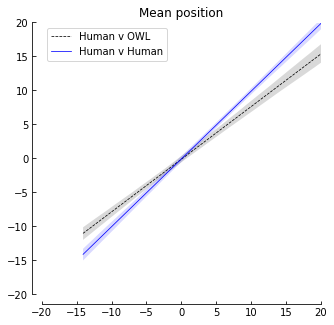

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.regplot(long['Human'], long['OWL'], scatter = False,
    fit_reg = True, color = 'black', label="Human v OWL",line_kws={'linewidth':.75, 'linestyle':'--'})
ax = sns.regplot(xs['H1'], xs['H2'], scatter = False,
    fit_reg = True, color = 'blue', label="Human v Human", line_kws={'linewidth':.75})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set(xlim=(-20,20), ylim=(-20, 20), title='Mean position')
ax.tick_params(axis="both",direction="in")
ax.legend()
sns.despine(offset=10)
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_mnX.svg')

5. Plotting the residiuals for the regression above

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


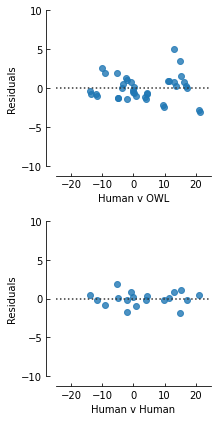

In [23]:
fig, (ax1, ax2) = plt.subplots(figsize=(3,6), nrows=2, ncols=1)

sns.residplot(long['Human'], long['OWL'], ax=ax1)
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Human v OWL')
ax1.set_ylim(-10,10)
ax1.set_xlim(-25,25)
ax1.tick_params(axis='both',direction="in")
ratio = 1.0
x_left, x_right = ax1.get_xlim()
y_low, y_high = ax1.get_ylim()
ax1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

sns.residplot(xs['H1'], xs['H2'], ax=ax2)

ax2.set_ylabel('Residuals')
ax2.set_xlabel('Human v Human')
ax2.set_ylim(-10,10)
ax2.set_xlim(-25,25)
ax2.tick_params(axis='both',direction="in")
ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

sns.despine(offset=10)
fig.tight_layout()
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_mnX_resids.svg')



## Density curves comparing worm locations identified by H1, H2 and OWL

In [16]:
subs = ['loc_S1_005_1C', 'loc_S1_010_2D', 'loc_S1_004_2D', 'loc_S1_004_2B']
subs_df = combined.loc[combined['FileName'].isin(subs)]

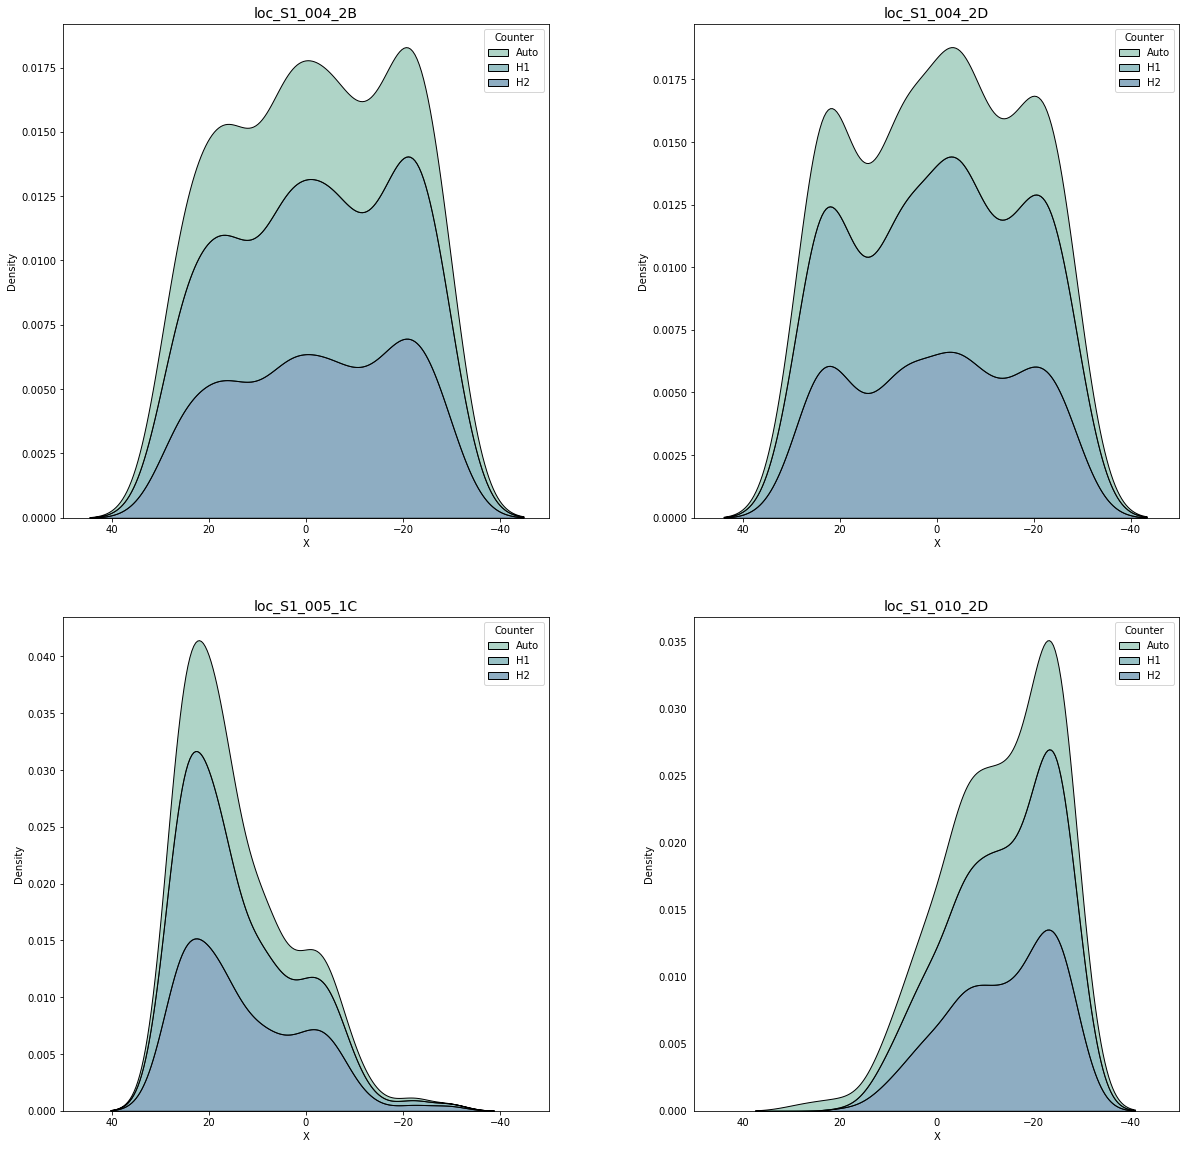

In [17]:
subs_grouped = subs_df.groupby('FileName')

font = {'weight':'normal', 'size':10}


f, ax = plt.subplots(nrows=2, ncols=2,
                        figsize=(20, 20),
                        gridspec_kw={'wspace': 0.30},
                       )
i=0

for n, g in subs_grouped:
    fname = g['FileName'].unique()[0]
    plt.tick_params(left=False, bottom=False)
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('font', **font)

    #sns.displot(data=g, x="X", hue="Counter", kind="kde", label='FileName', fill=True, ax=ax.flat[i])
    sns.kdeplot(data=g, x="X", hue="Counter", fill=True, ax=ax.flat[i], multiple="stack", alpha=.5, palette="crest").set(title = fname, 
                xlim = (50,-50))
    i += 1

    plt.rcParams['svg.fonttype'] = 'none'

#plt.savefig('C:/Users/Emily/Desktop/UL_analysis/subset_hva.svg')